#  predict a close point

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0


In [4]:
df


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,623400.0
1254,12/27/2016,790.68,797.86,787.66,791.55,789100.0
1255,12/28/2016,793.70,794.23,783.20,785.05,1153800.0
1256,12/29/2016,783.33,785.93,778.92,782.79,744300.0


In [5]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   float64
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [7]:
df['Close']=df['Close'].str.replace(',','').astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


<AxesSubplot:>

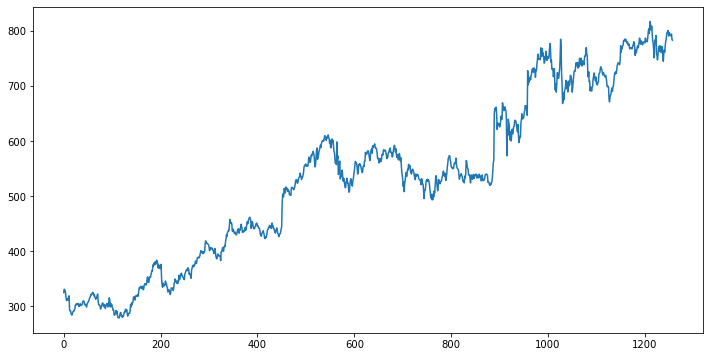

In [9]:
df['Open'].plot(figsize=(12,6))

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [11]:
x=df[['Open', 'High', 'Low','Volume']]
y=df[ 'Close']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 59.1+ KB


In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr=LinearRegression()

In [17]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
print(lr.coef_)

[ 1.29867407e+00 -1.16359950e+01  1.09670768e+01  3.86294797e-05]


In [19]:
lr.intercept_

351.69080875512464

In [20]:
prediction=lr.predict(x_test)

In [21]:
print(x_test)

        Open    High     Low     Volume
5     313.70  315.72  307.30  8824000.0
494   538.37  543.96  537.53  3343800.0
52    310.40  317.45  309.46  4361800.0
985   768.90  775.96  758.96  2230400.0
186   378.56  380.00  374.42  7891600.0
...      ...     ...     ...        ...
1023  722.22  733.69  712.35  2676400.0
506   570.86  571.52  564.53  4501700.0
1068  750.06  752.80  742.43  1134200.0
1124  699.06  700.86  693.08  1184300.0
689   575.35  578.26  571.28  1621700.0

[378 rows x 4 columns]


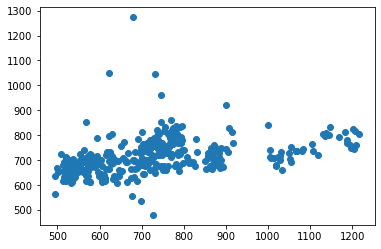

In [22]:
plt.scatter(y_test,prediction)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

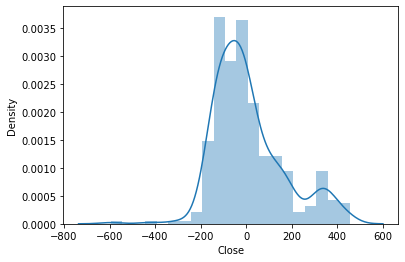

In [23]:
sns.distplot(y_test-prediction)

In [24]:
from sklearn import metrics

In [25]:
print('MAE', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test,prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 116.36907922674244
MSE: 24349.35044125217
RMSE: 156.04278400891266
